In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import openpyxl as opx

import plotly.express as px
import plotly.graph_objs as go
import plotly.graph_objects as go

from statsmodels.distributions.empirical_distribution import ECDF
from sklearn.preprocessing import OneHotEncoder
from collections import Counter as counter

%matplotlib inline

In [2]:
path = 'input/'
tr_name = 'train.csv'
ts_name = 'test.csv'

In [3]:
train_df = pd.read_csv(path+tr_name)
test_df = pd.read_csv(path+ts_name)

In [14]:
train_df.shape,test_df.shape

((1460, 81), (1459, 80))

In [15]:
test_df.head(1)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,empty,Reg,Lvl,AllPub,...,120,0,empty,MnPrv,empty,0,6,2010,WD,Normal


In [16]:
#train_df.info()
cat_columns = []
for column in train_df.columns:
    if train_df[column].dtype == 'object' or column == 'Id':
        cat_columns.append(column)
print(cat_columns)

['Id', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [19]:
for column in cat_columns:    
    train_df[column] = train_df[column].fillna('empty')
    test_df[column] = test_df[column].fillna('empty')

In [20]:
train_df['Alley'].unique()

array(['empty', 'Grvl', 'Pave'], dtype=object)

check consistency data

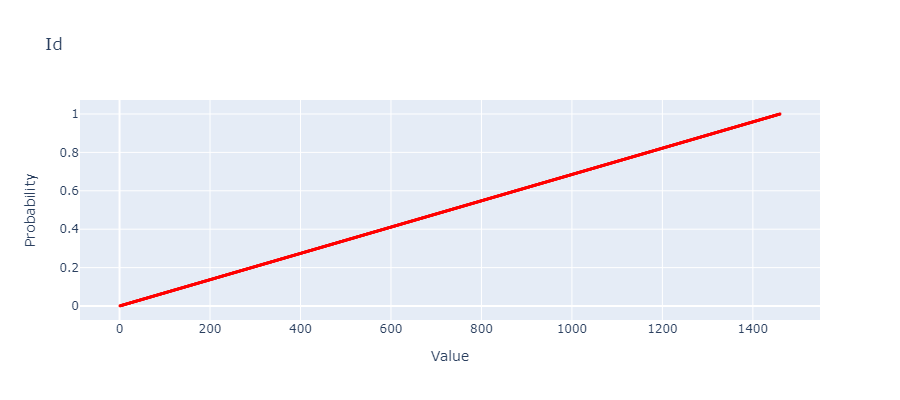

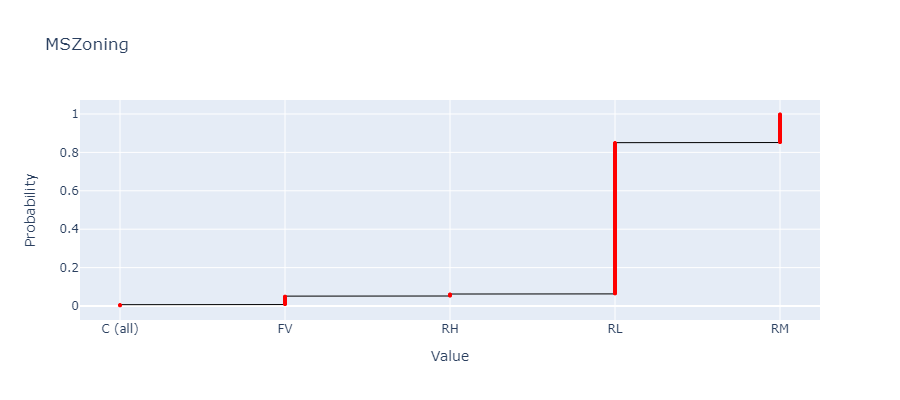

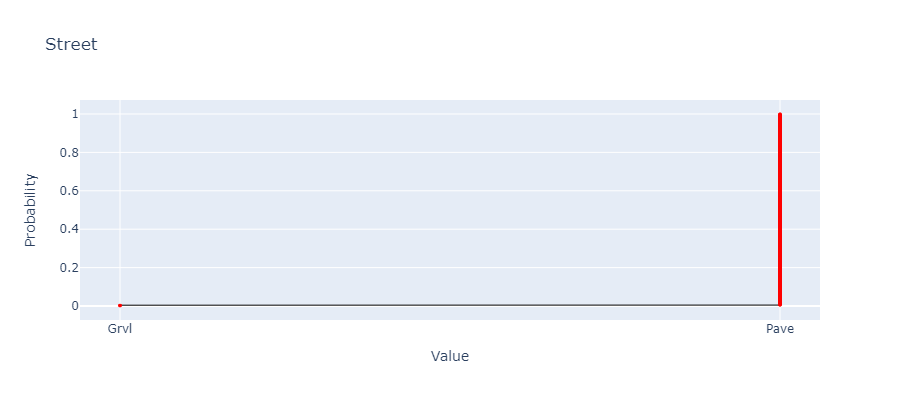

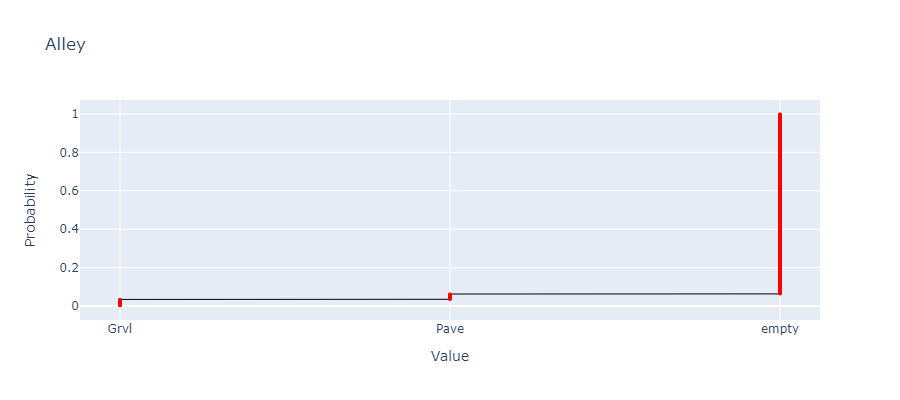

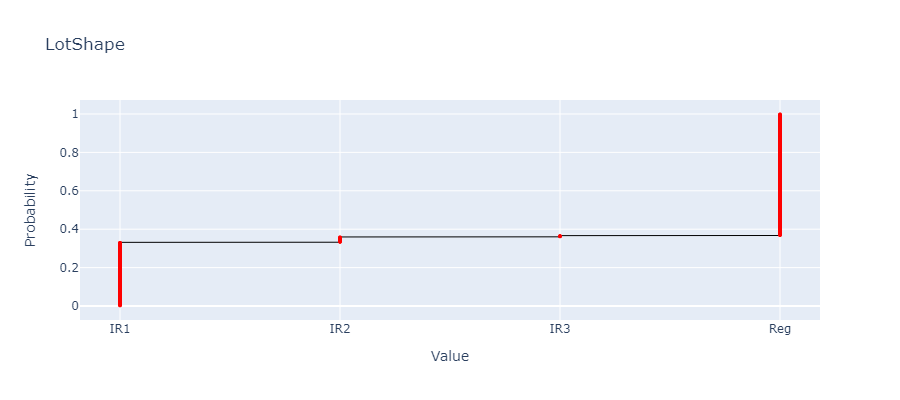

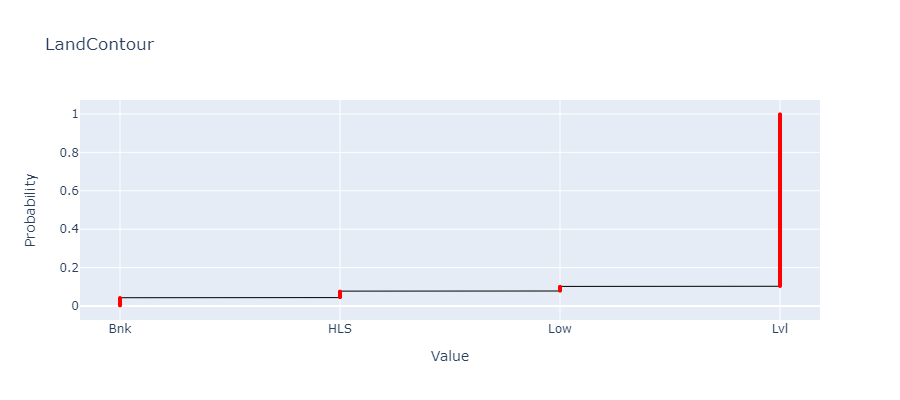

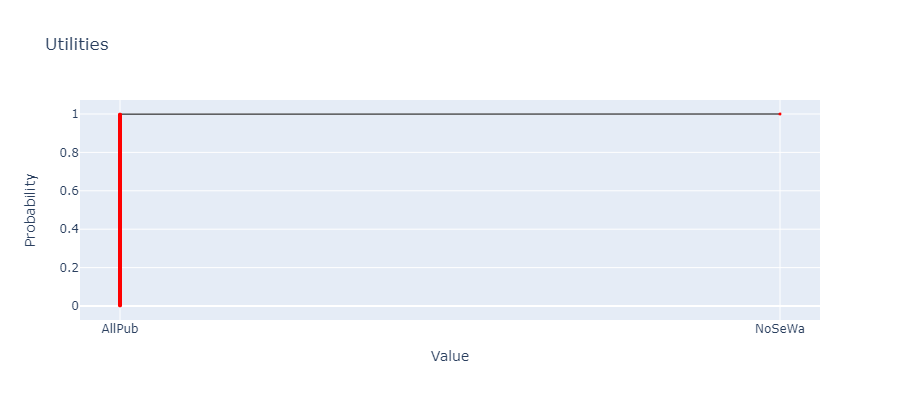

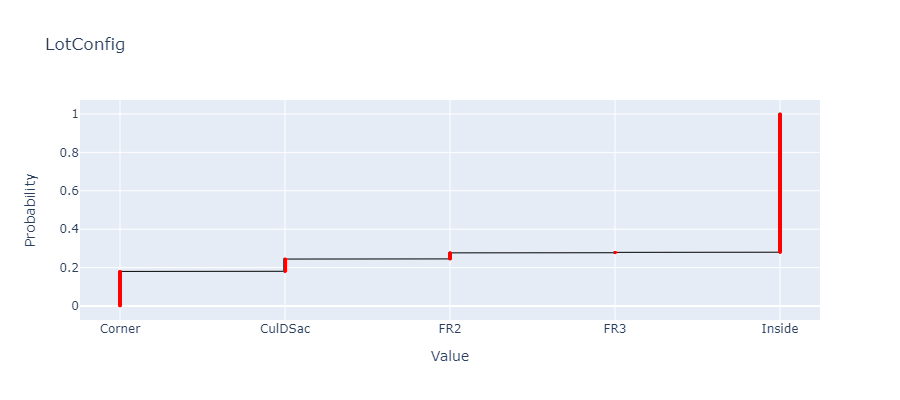

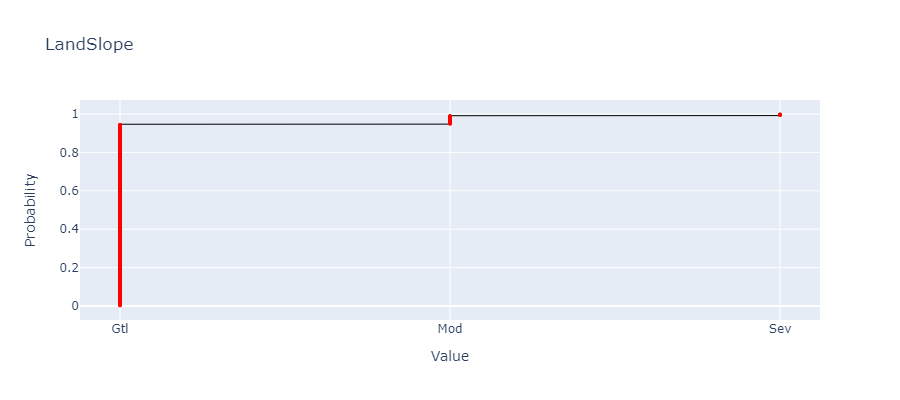

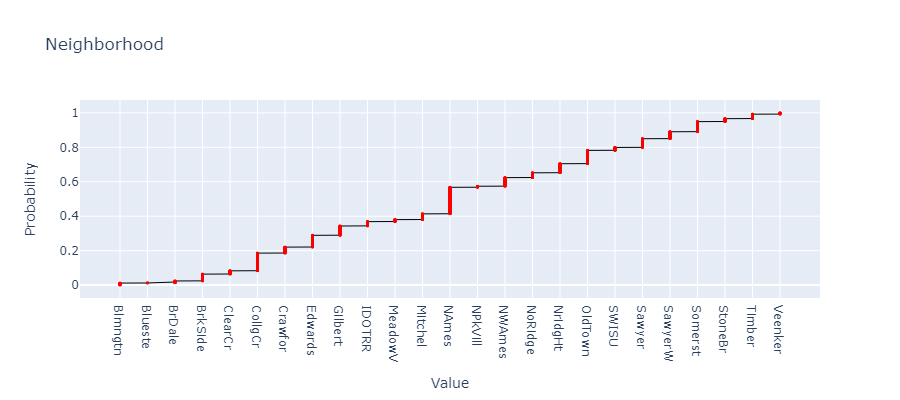

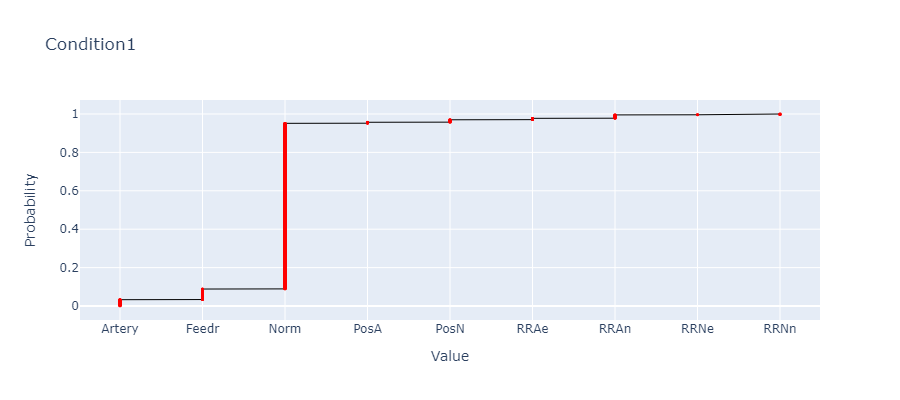

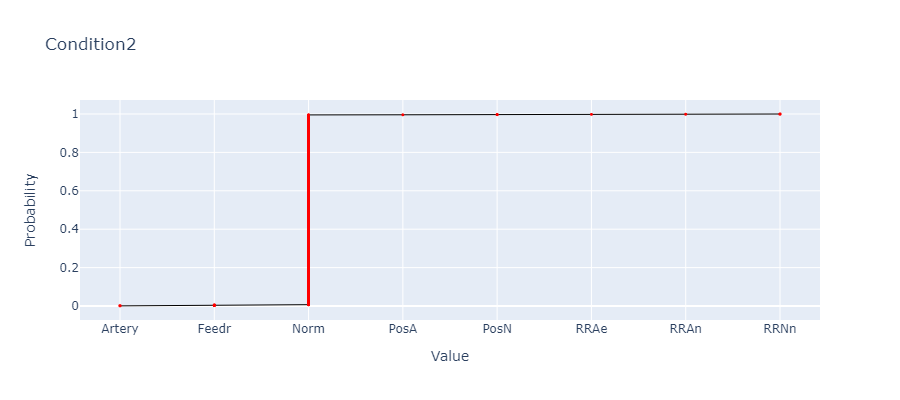

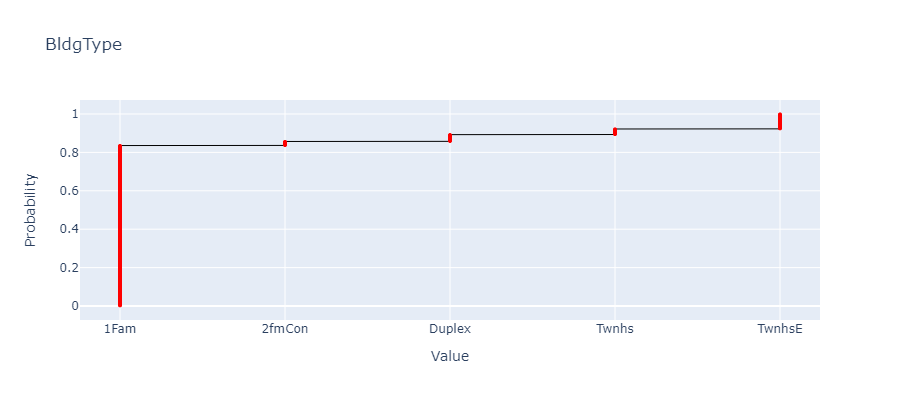

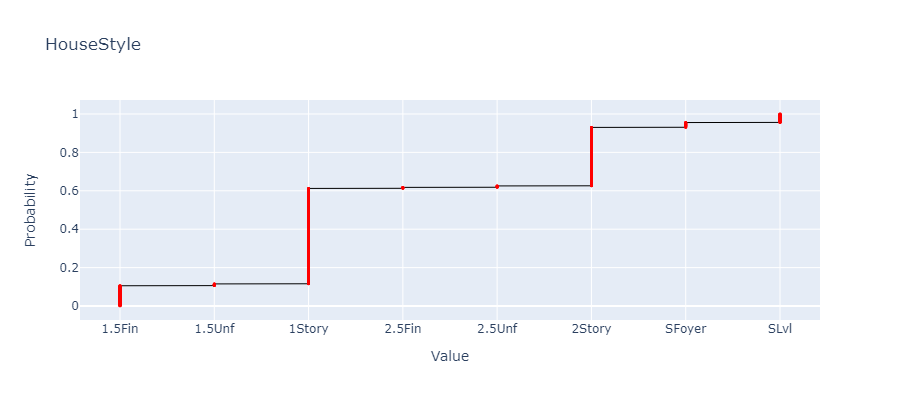

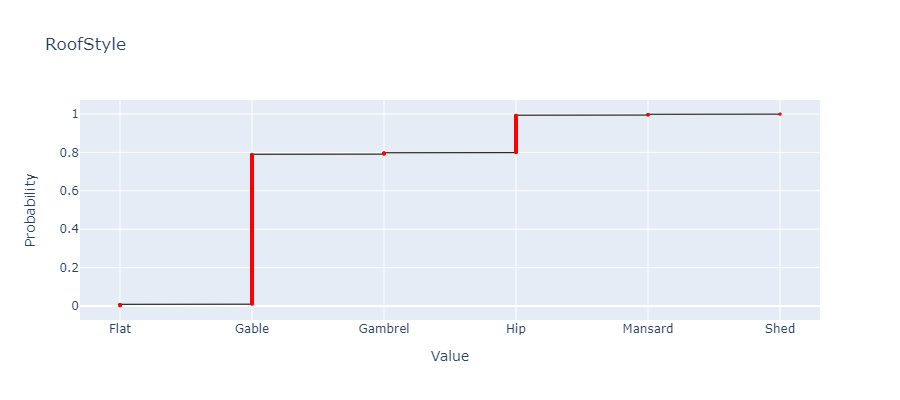

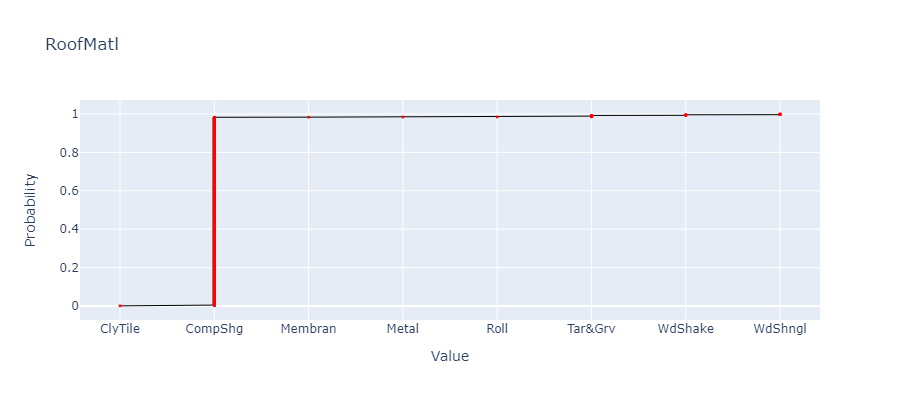

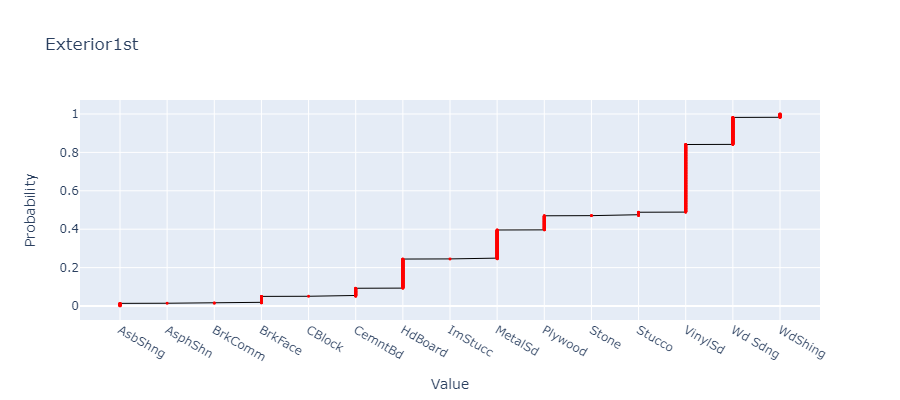

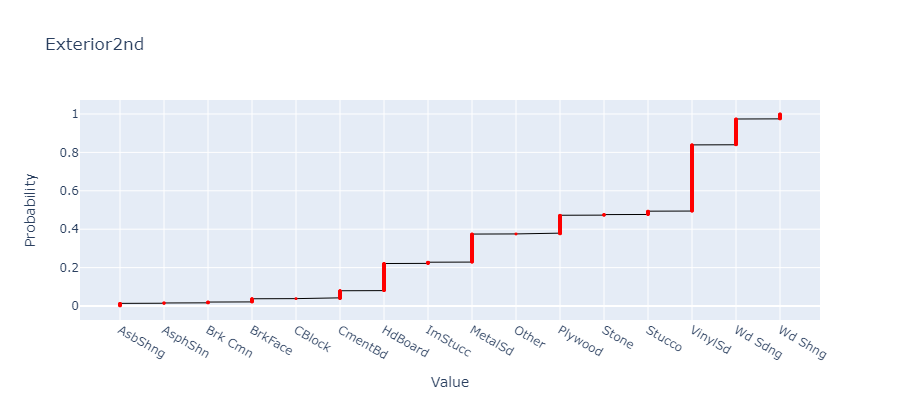

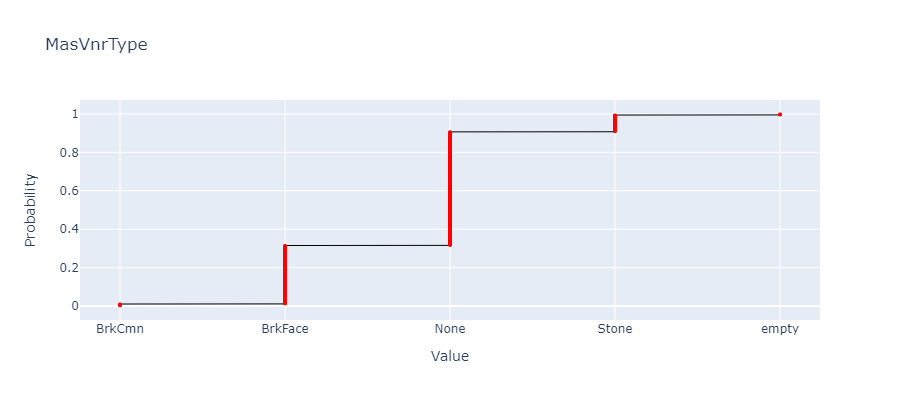

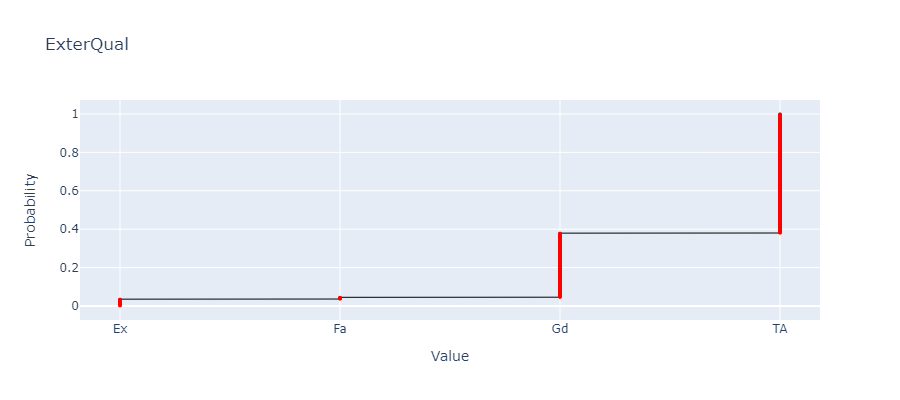

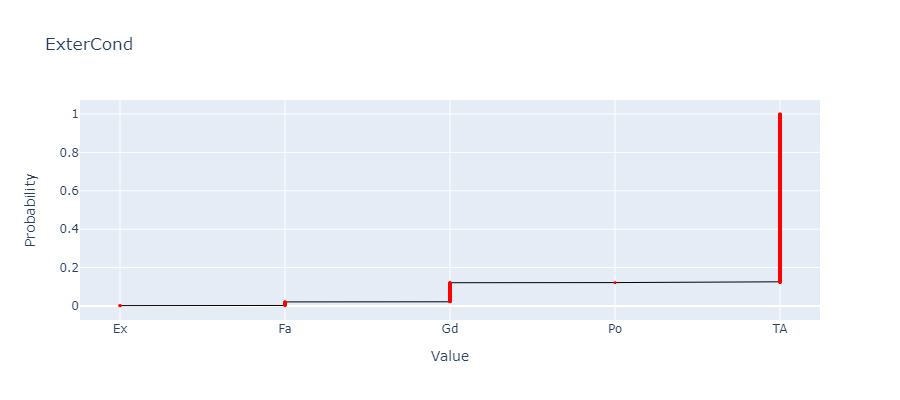

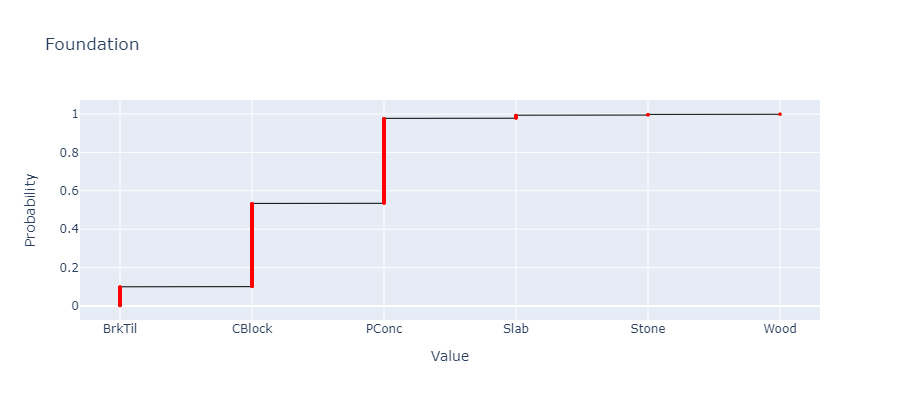

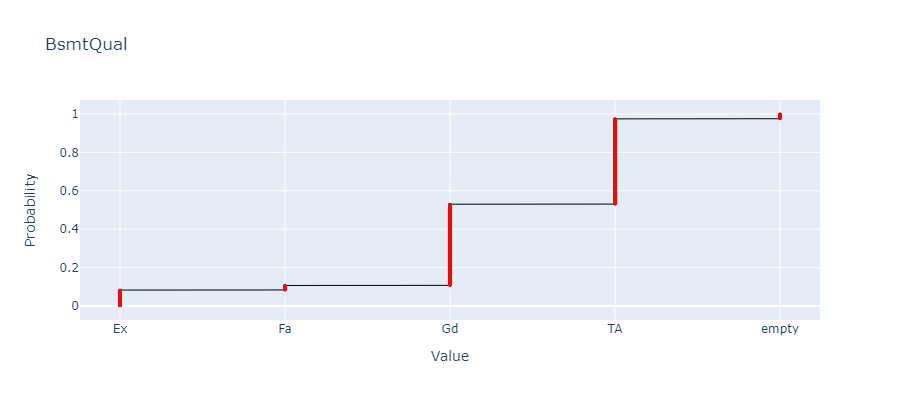

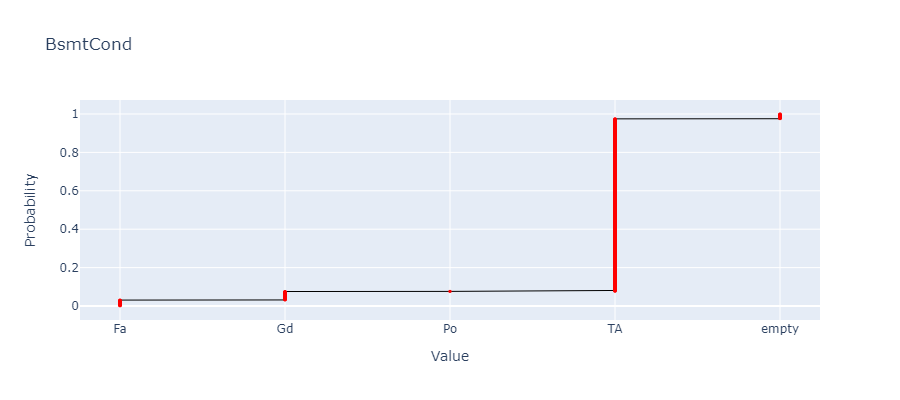

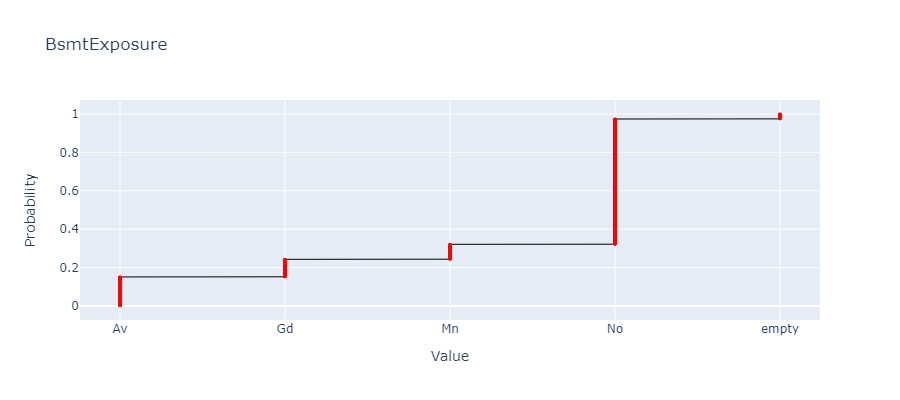

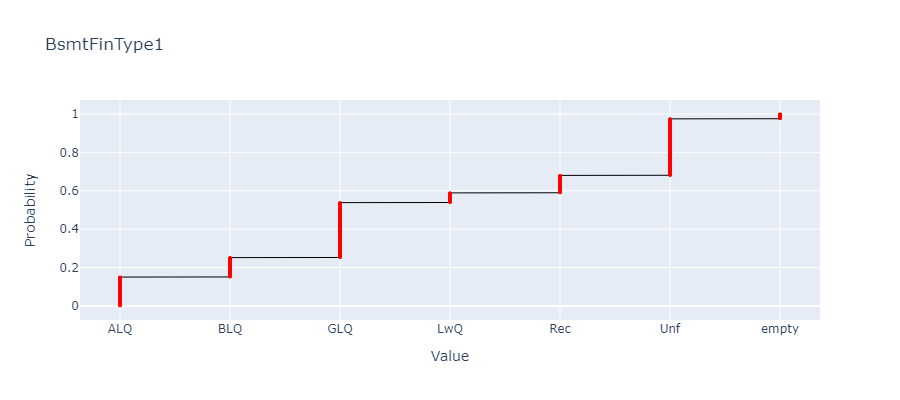

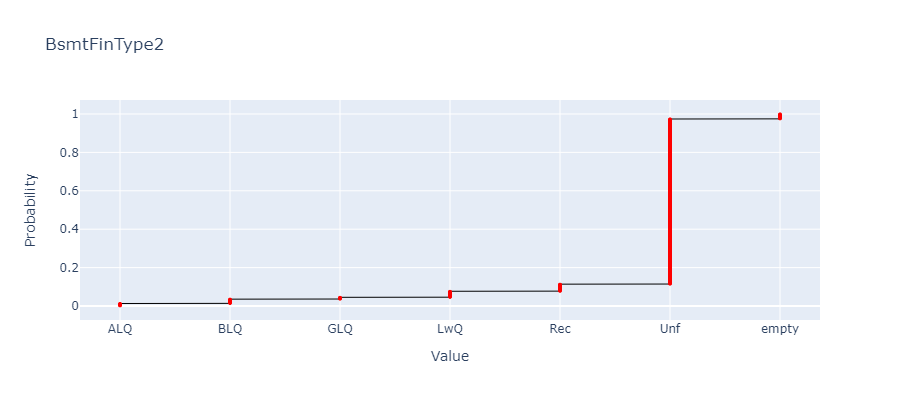

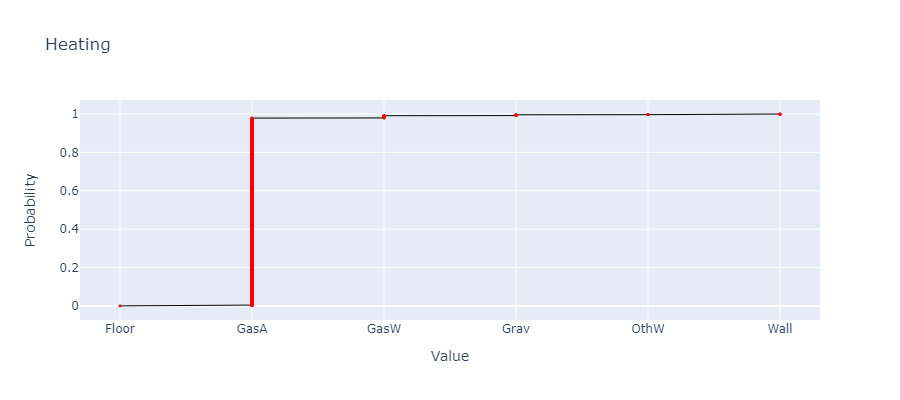

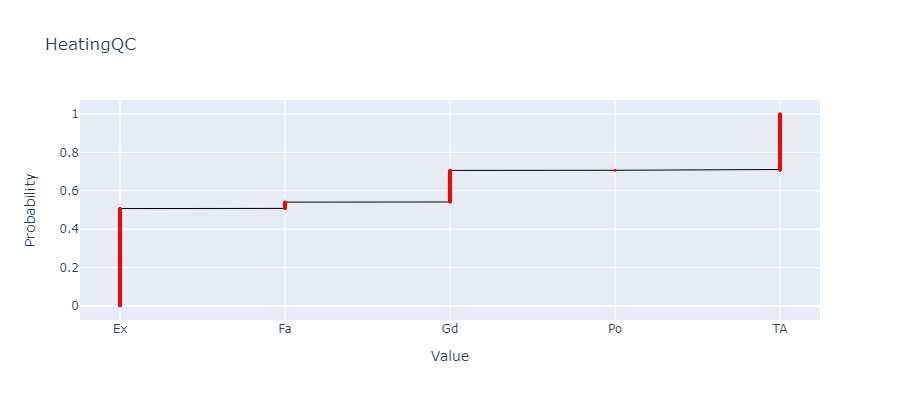

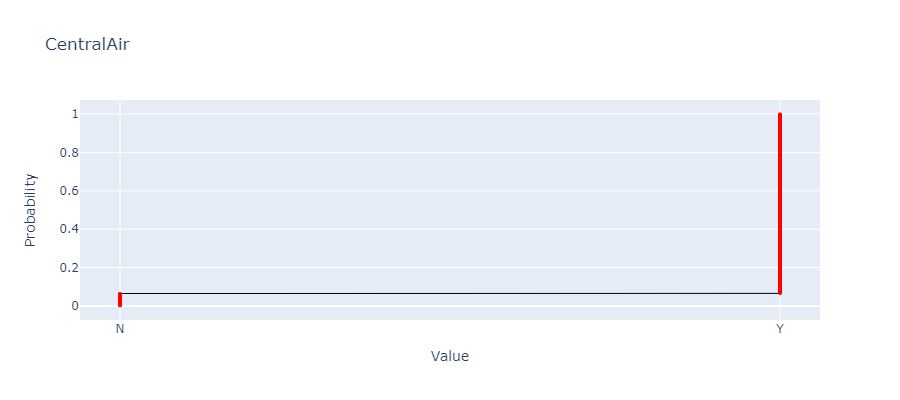

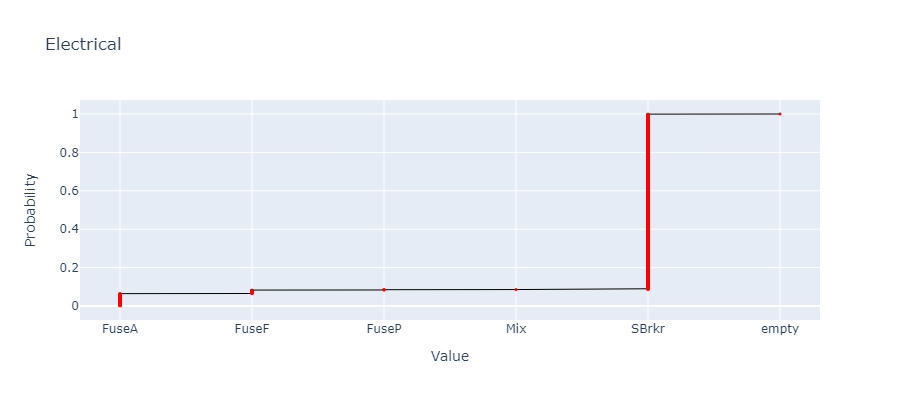

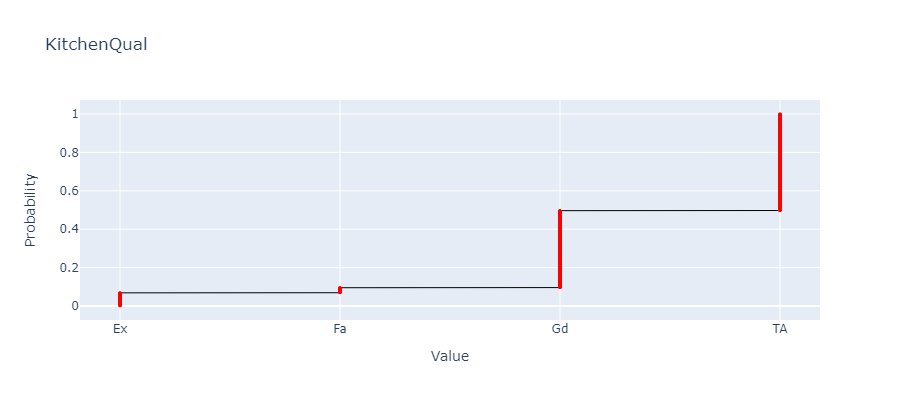

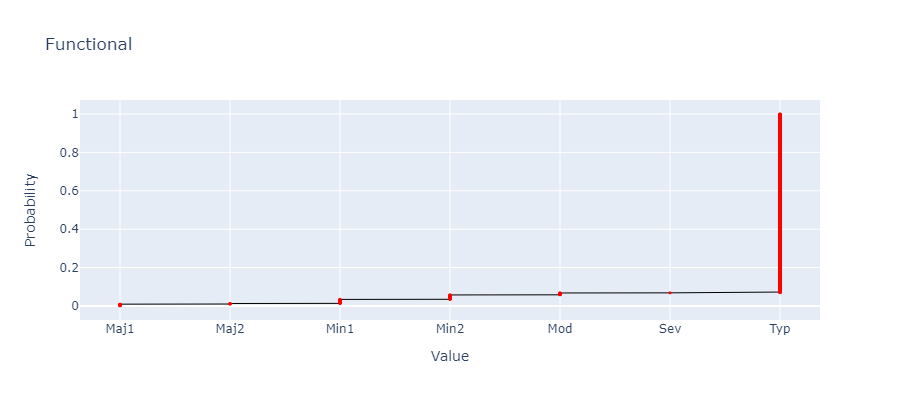

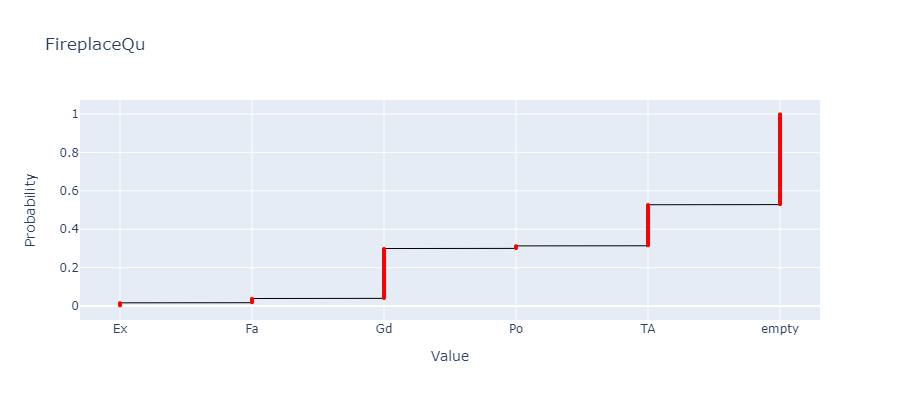

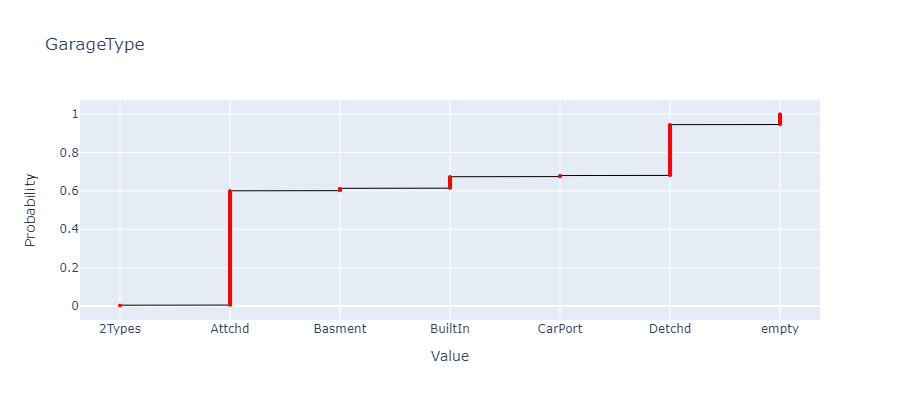

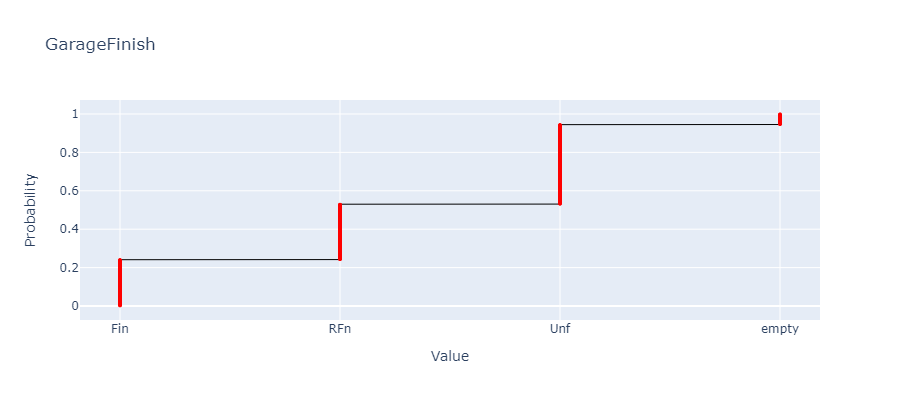

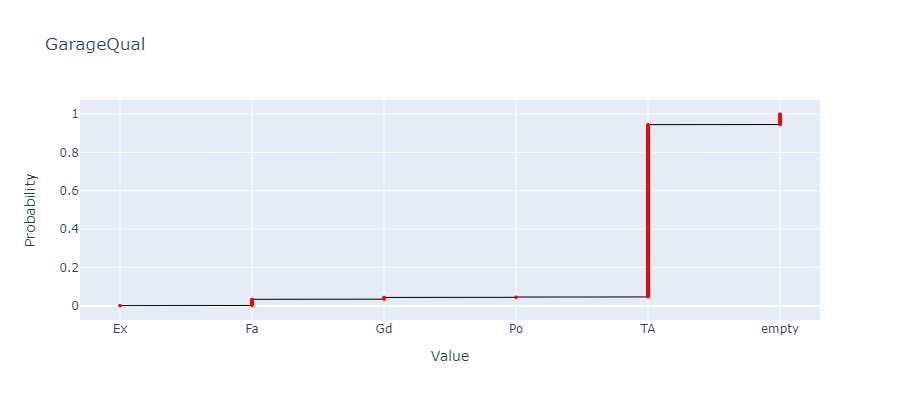

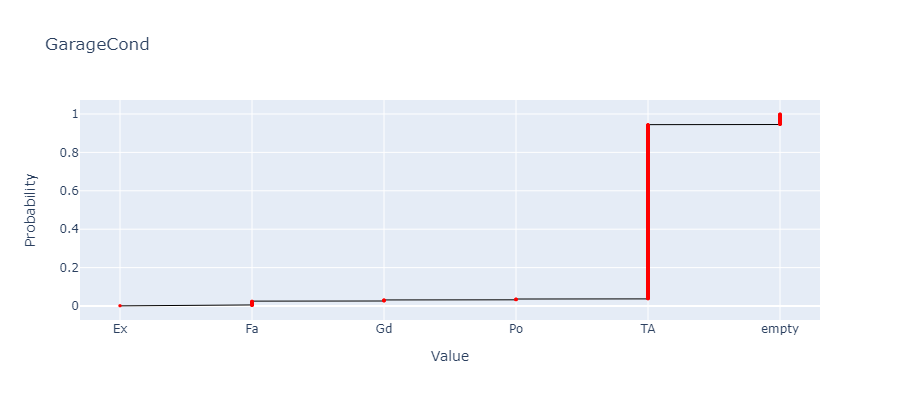

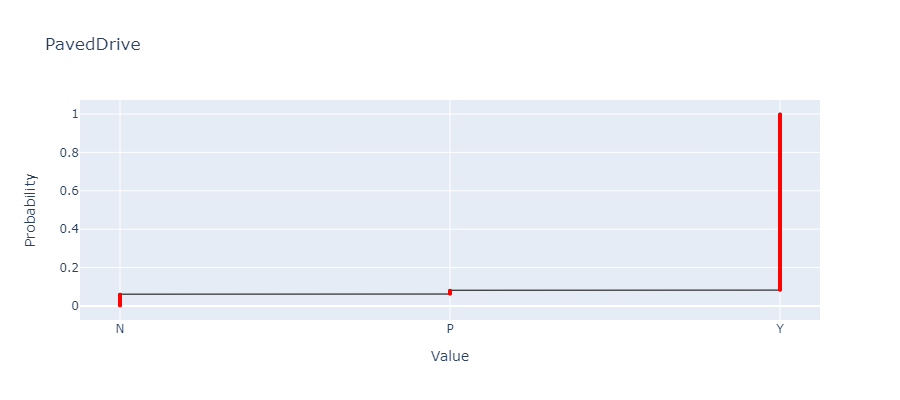

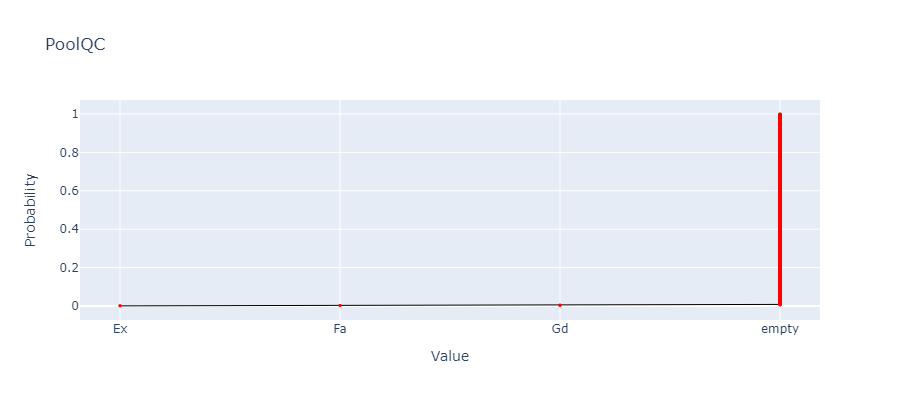

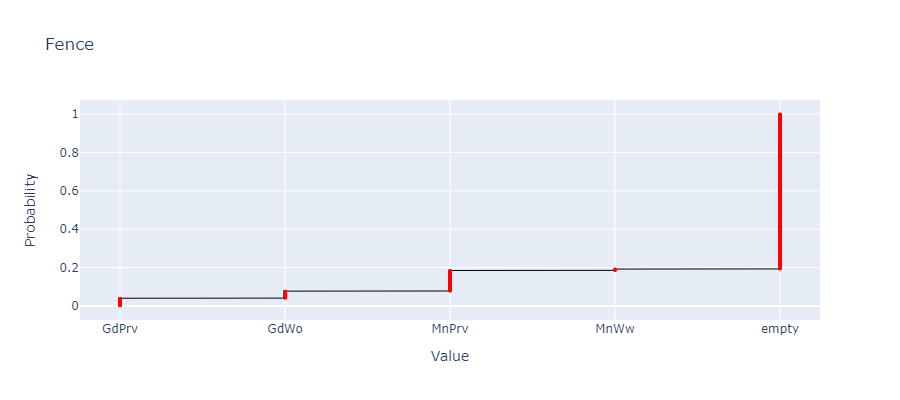

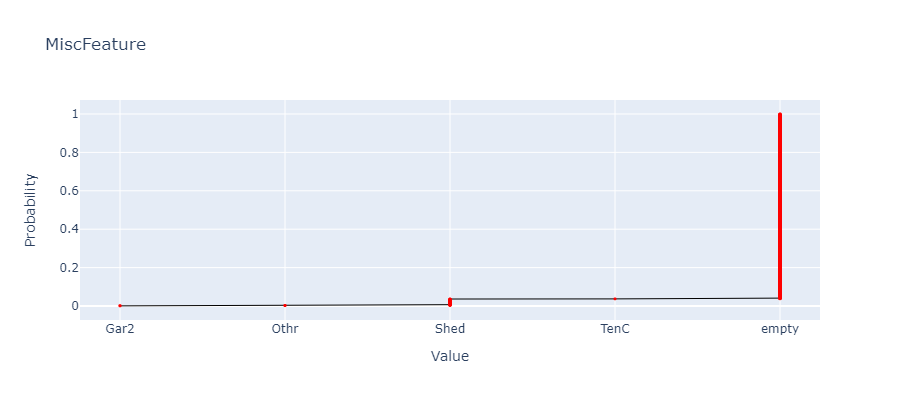

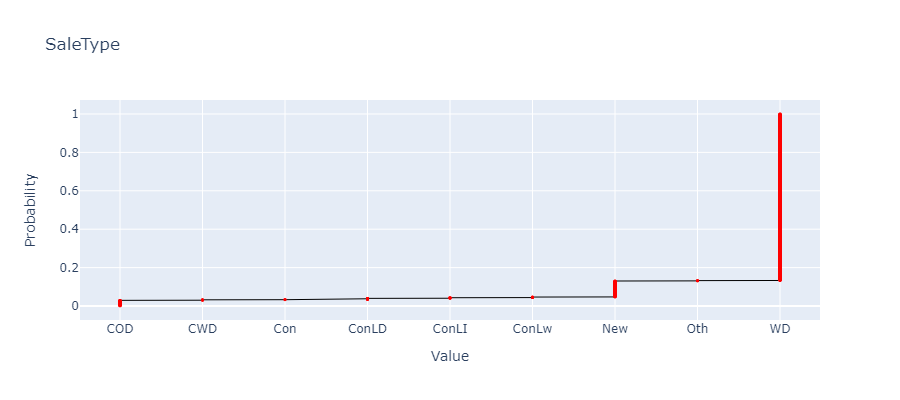

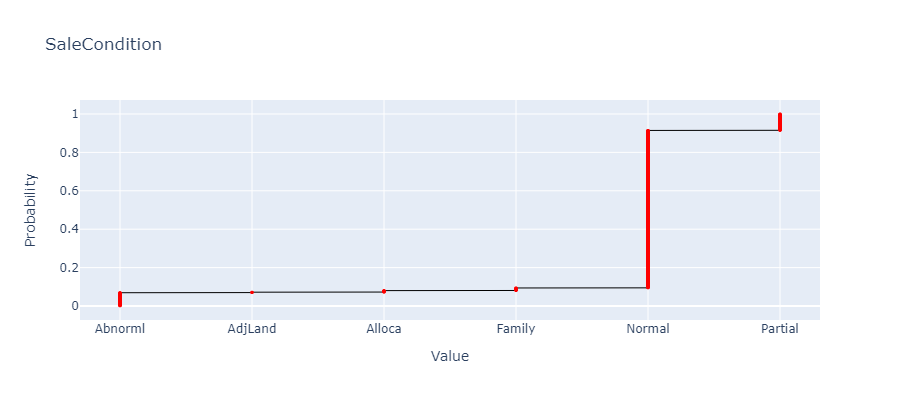

In [22]:

for column in cat_columns:
    fig = go.Figure()
    ecdf = ECDF(train_df[column])
    fig.add_trace(
        go.Scatter(
            x=ecdf.x,
            y=ecdf.y,
            mode='markers+lines',
            legendgroup="group",
            name = column,
            marker = dict(color = 'red',size = 3),
            line = dict(color = 'black',width  = 1)
        )
    )
    #print(column)
    fig.update_layout(title = column)
    fig.update_yaxes(automargin=True,title = 'Probability')
    fig.update_xaxes(automargin=True,title = 'Value')
    
    fig.update_layout(
        width=900,
        height=400)
    fig.show(renderer = "png")


In [23]:
excluded_cat_columns = [
    'Street',
    'Alley',
    'Utilities',
    'LandSlope',
    'Condition1',
    'Condition2',
    'RoofMatl',
    'BsmtCond',
    'BsmtFinType2',
    'Heating',
    'CentralAir',
    'Electrical',
    'Functional',
    'GarageCond',
    'GarageQual',
    'PavedDrive',
    'PoolQC',
    'MiscFeature'
]

In [24]:
for column in excluded_cat_columns:
    cat_columns.remove(column)

In [25]:
cat_columns

['Id',
 'MSZoning',
 'LotShape',
 'LandContour',
 'LotConfig',
 'Neighborhood',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtExposure',
 'BsmtFinType1',
 'HeatingQC',
 'KitchenQual',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'Fence',
 'SaleType',
 'SaleCondition']

### Numerical features

In [26]:
#train_df.info()
num_columns = []
for column in train_df.columns[:-1]:
    if train_df[column].dtype != 'object':
        num_columns.append(column)

In [27]:
for column in num_columns[:]:
    train_df[column] = train_df[column].fillna(0) 
    test_df[column] = test_df[column].fillna(0)   

Id


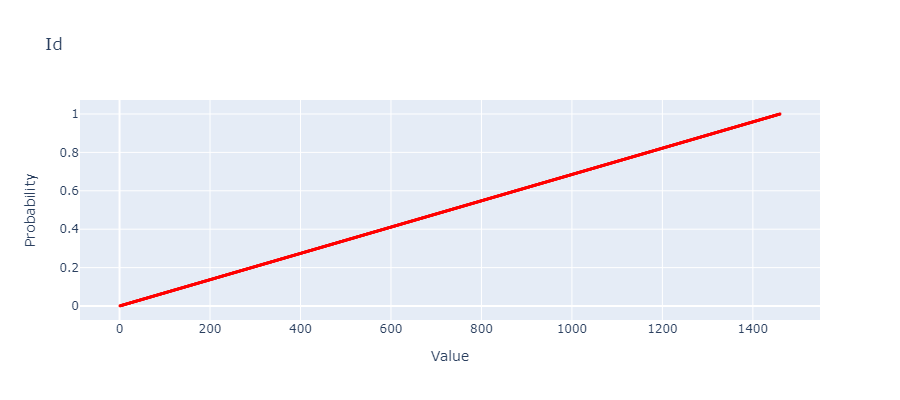

MSSubClass


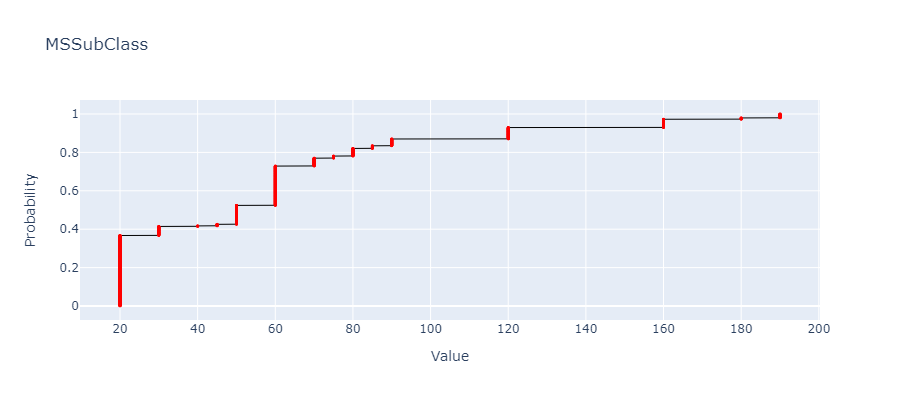

LotFrontage


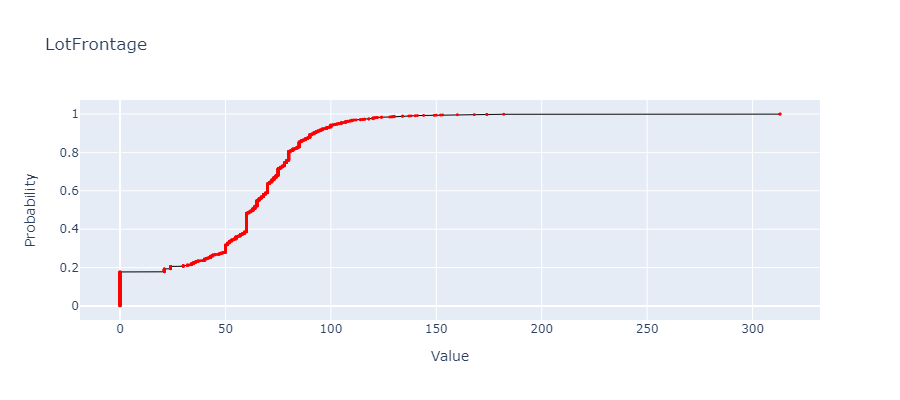

LotArea


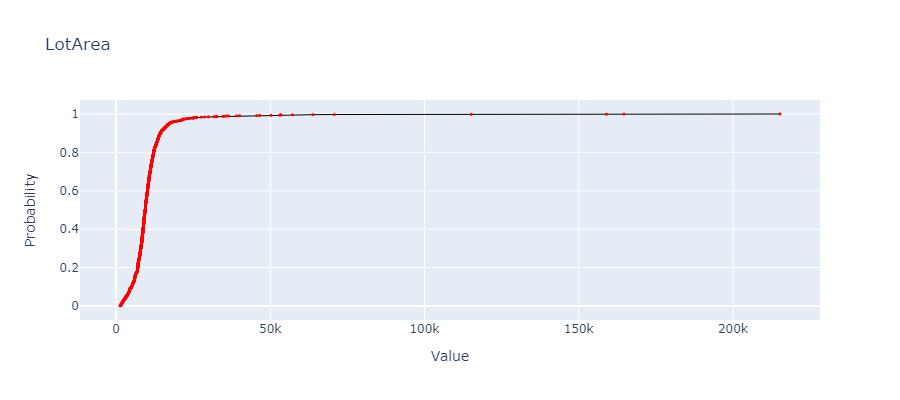

OverallQual


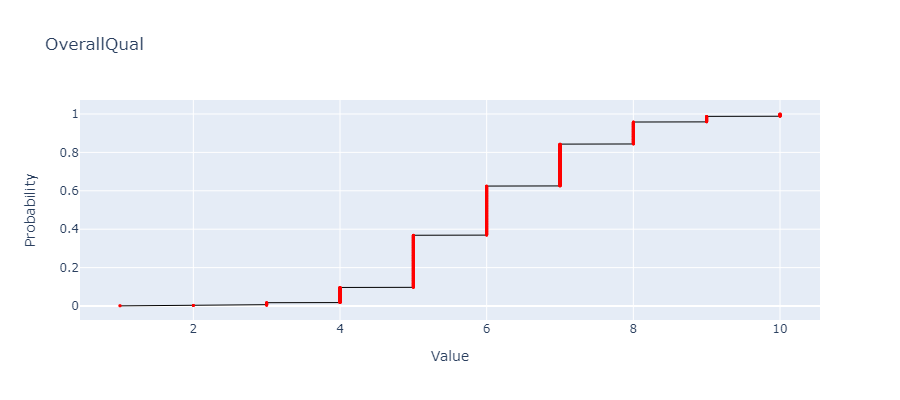

OverallCond


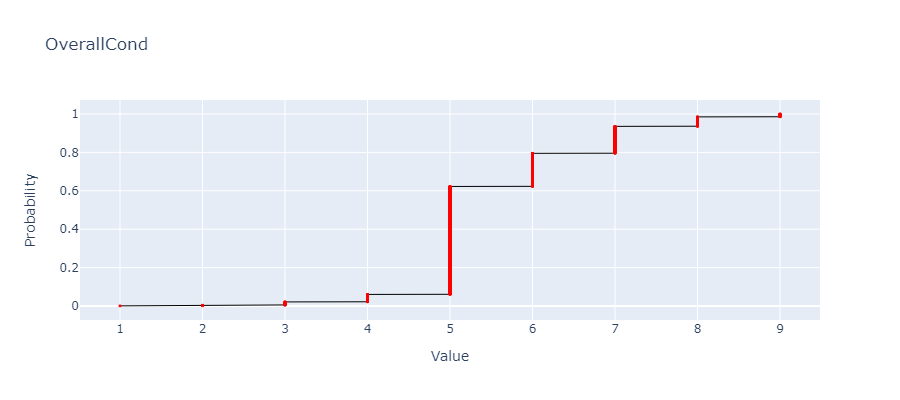

YearBuilt


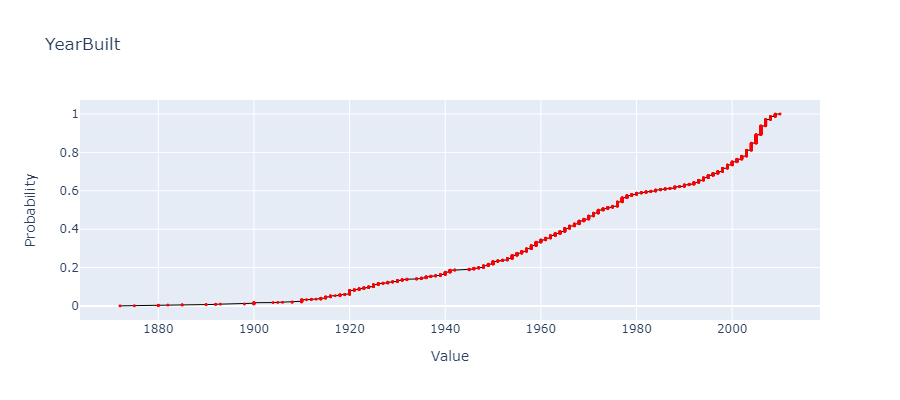

YearRemodAdd


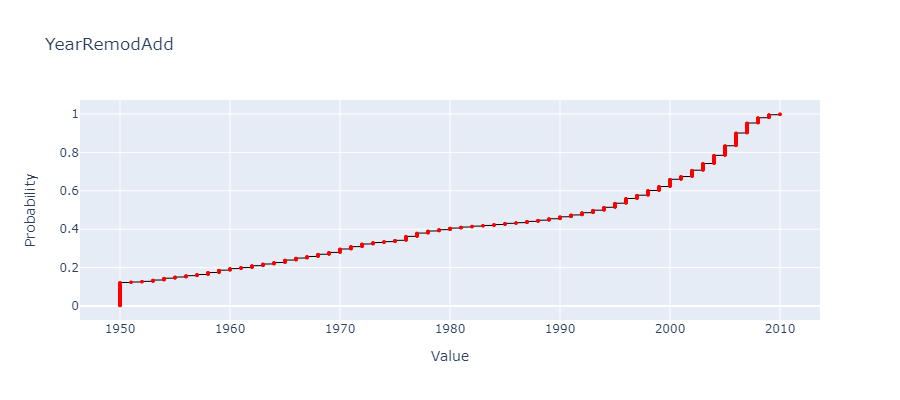

MasVnrArea


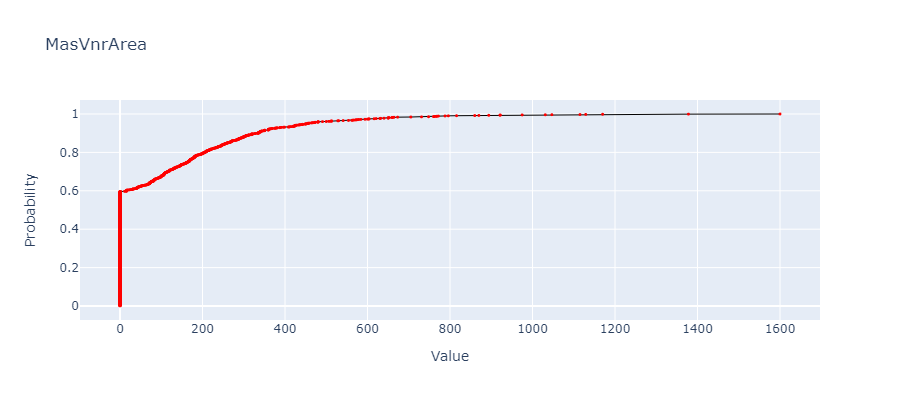

BsmtFinSF1


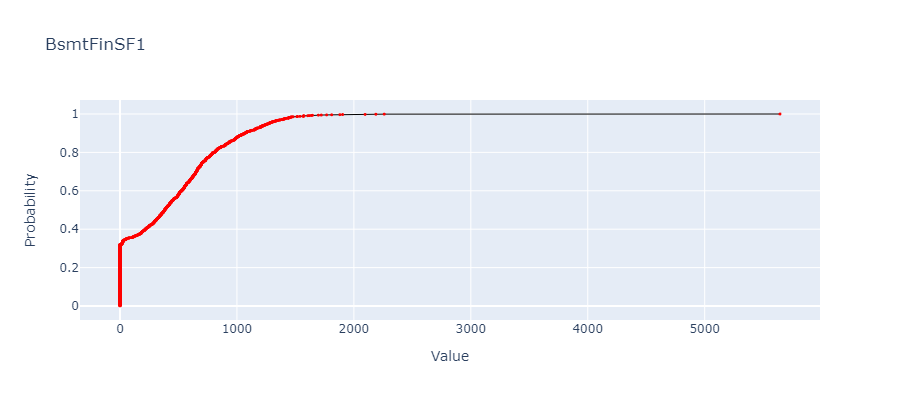

BsmtFinSF2


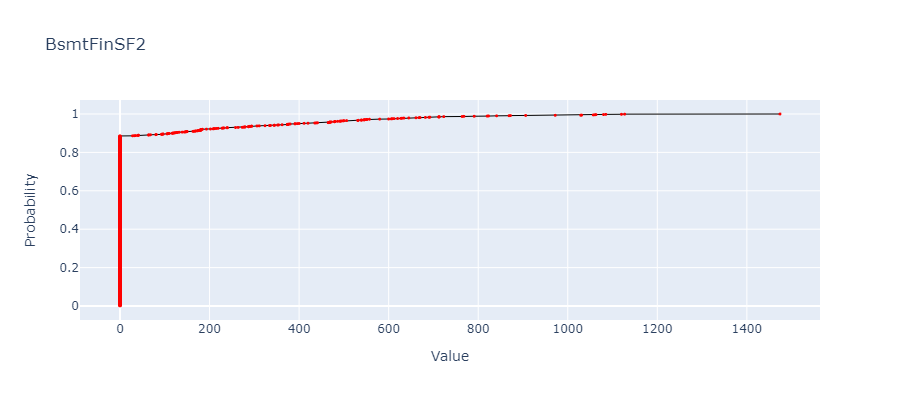

BsmtUnfSF


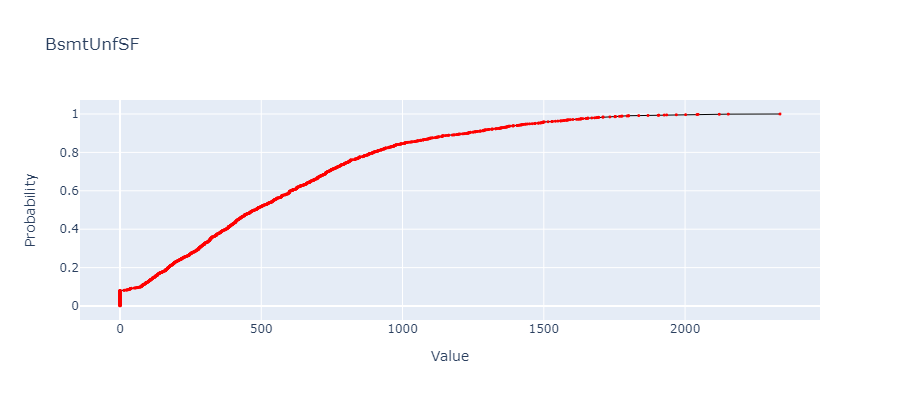

TotalBsmtSF


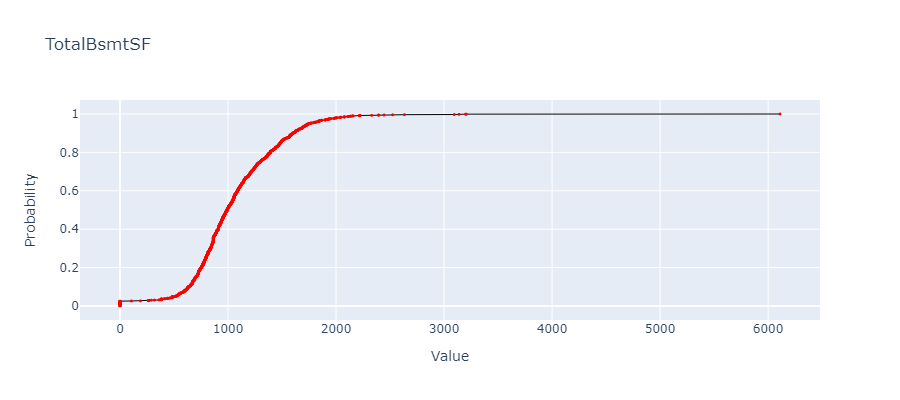

1stFlrSF


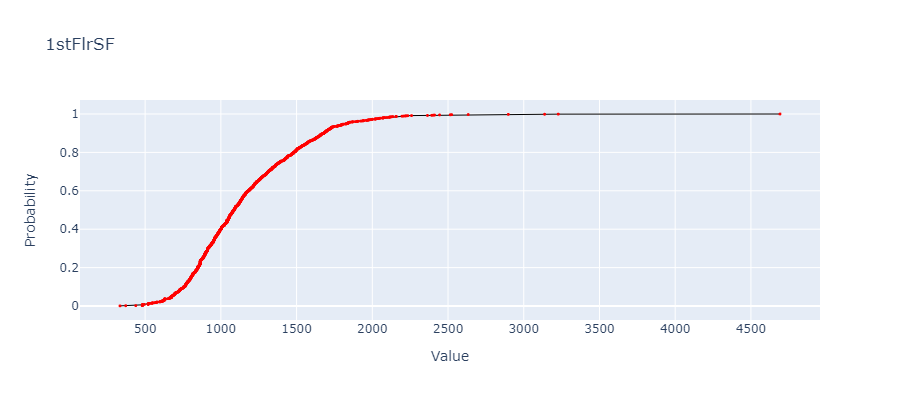

2ndFlrSF


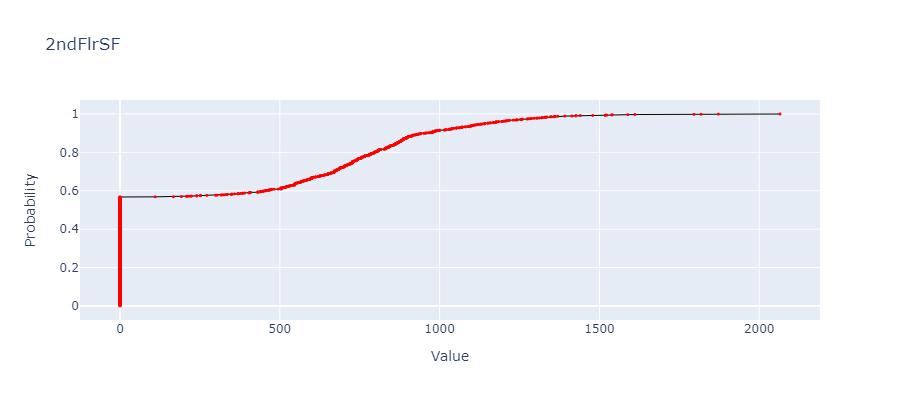

LowQualFinSF


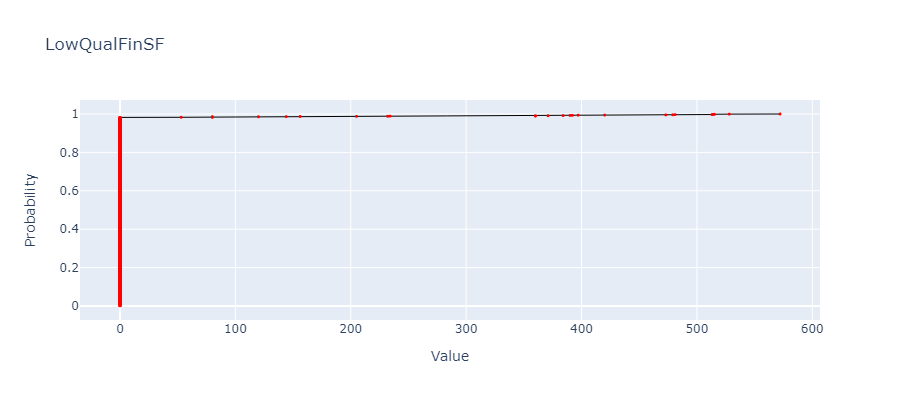

GrLivArea


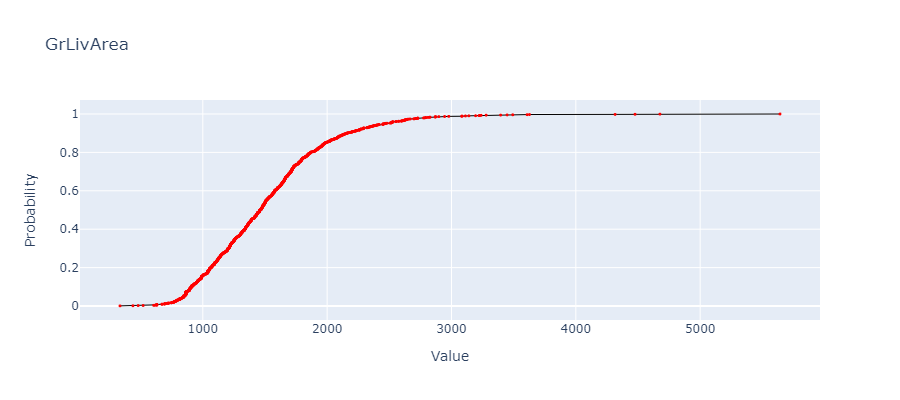

BsmtFullBath


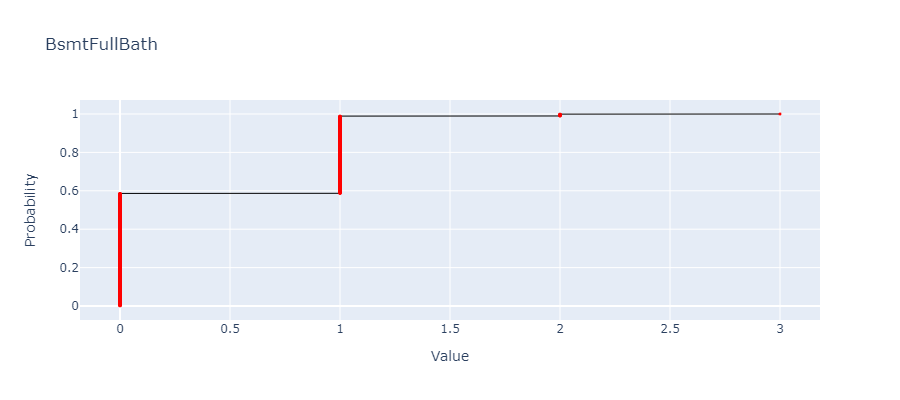

BsmtHalfBath


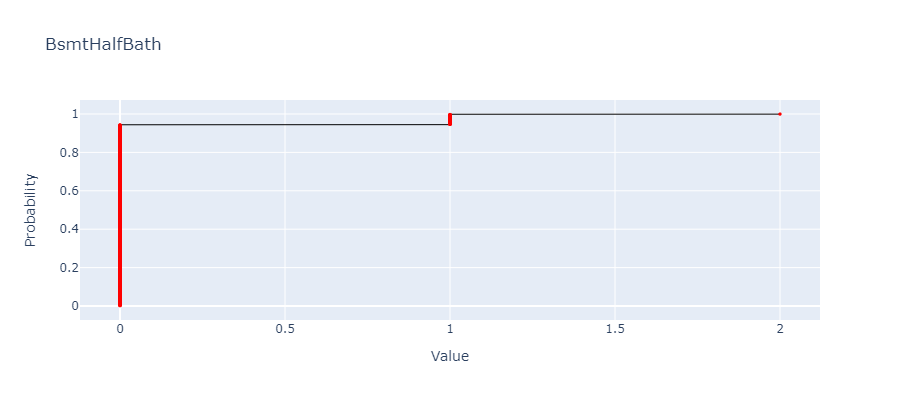

FullBath


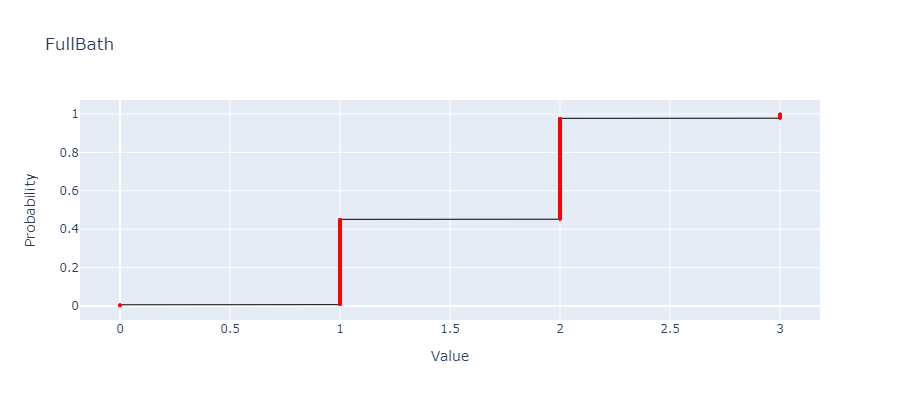

HalfBath


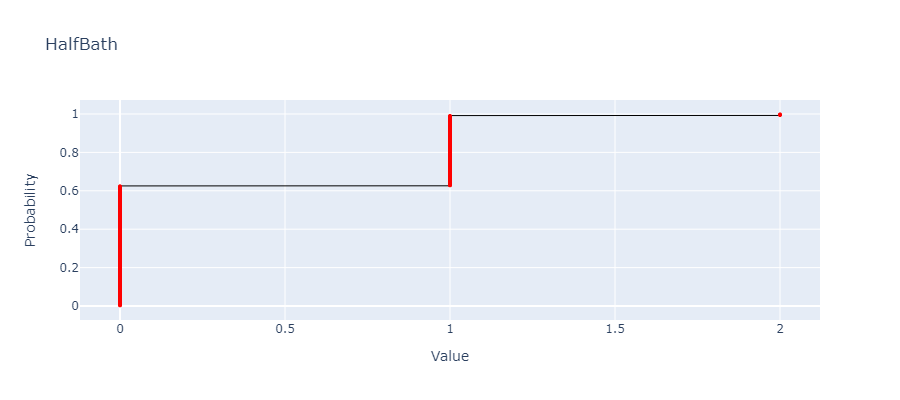

BedroomAbvGr


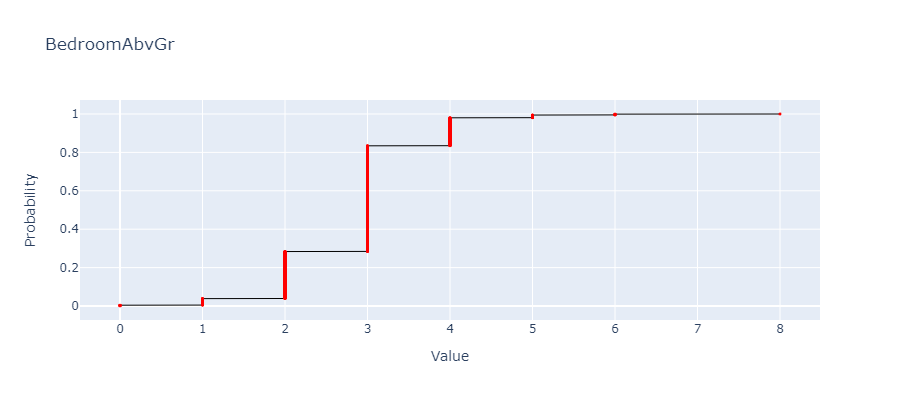

KitchenAbvGr


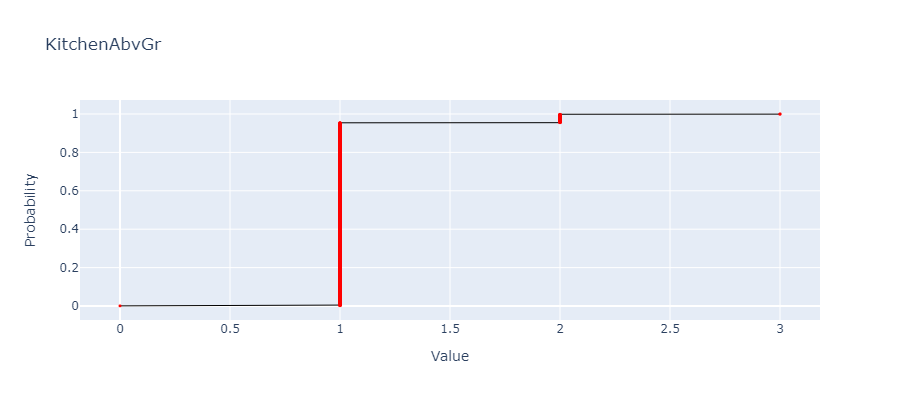

TotRmsAbvGrd


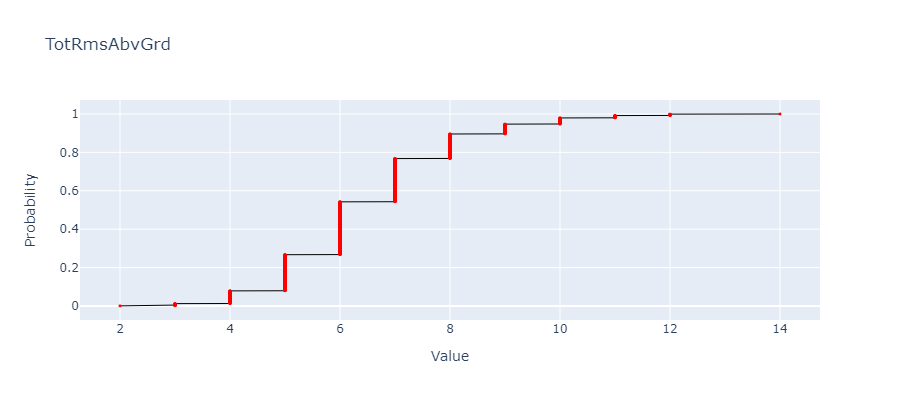

Fireplaces


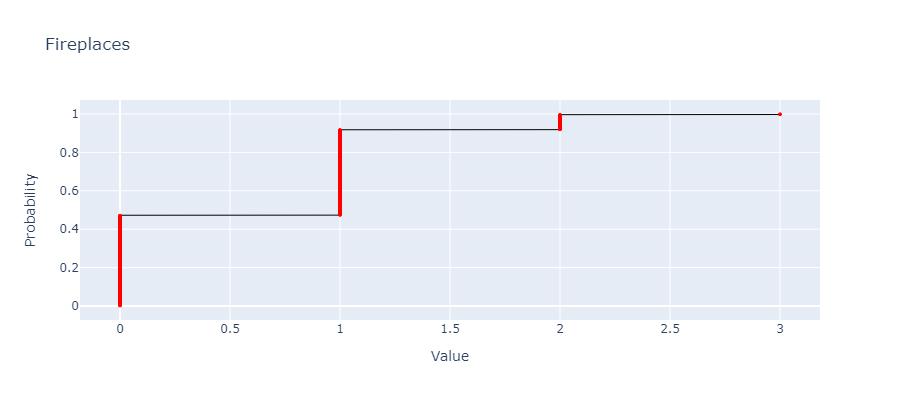

GarageYrBlt


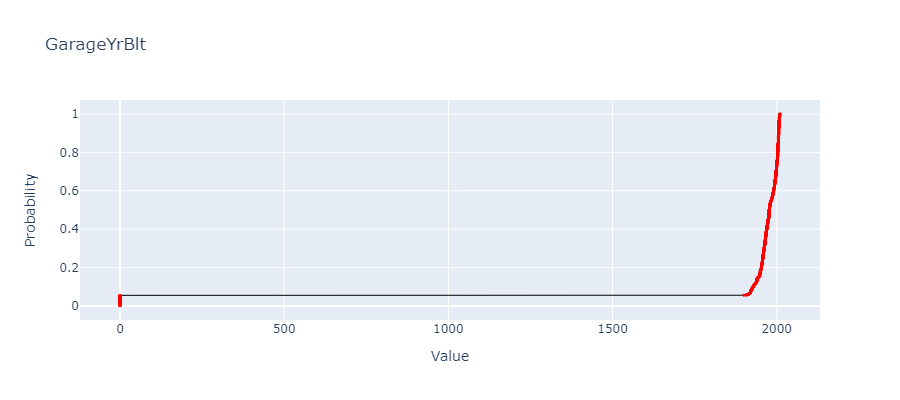

GarageCars


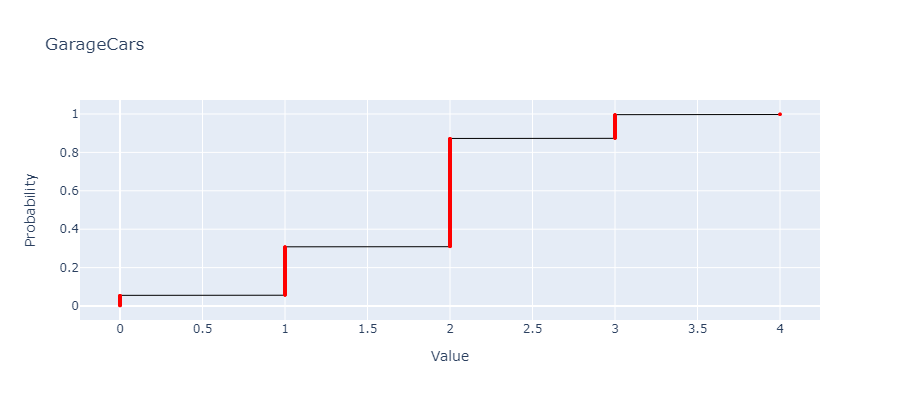

GarageArea


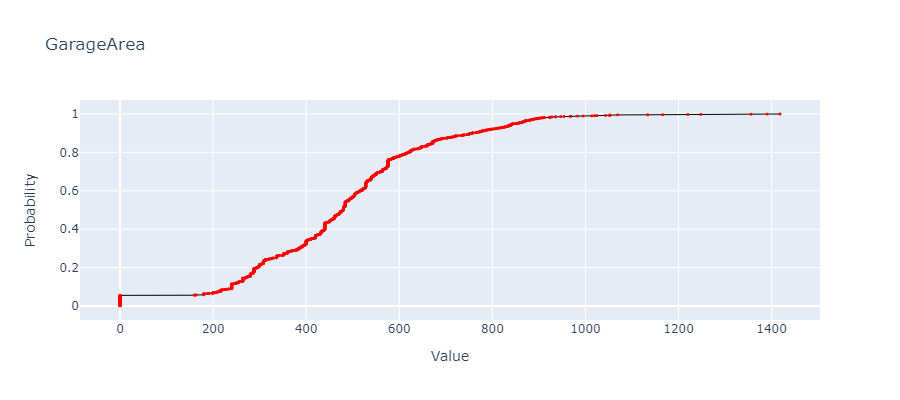

WoodDeckSF


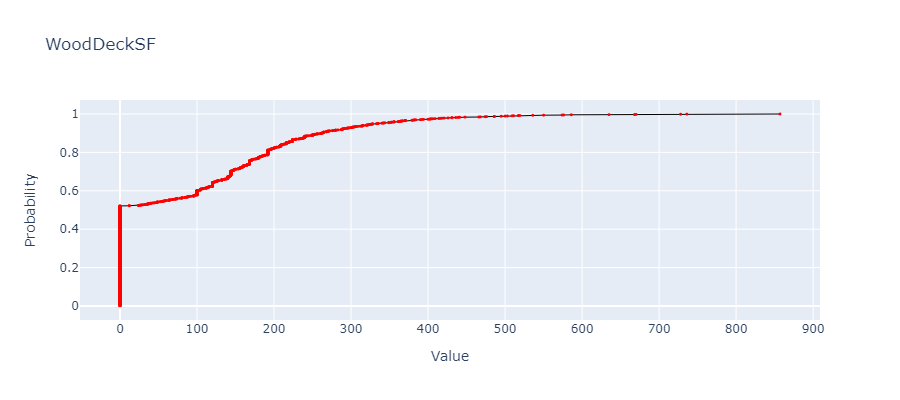

OpenPorchSF


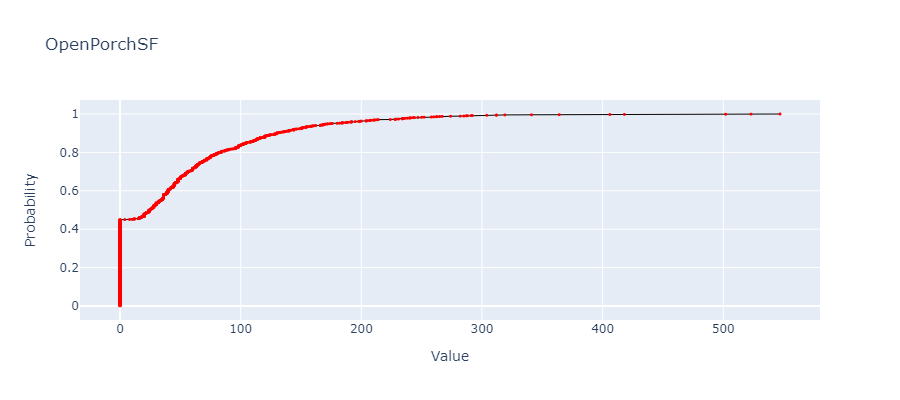

EnclosedPorch


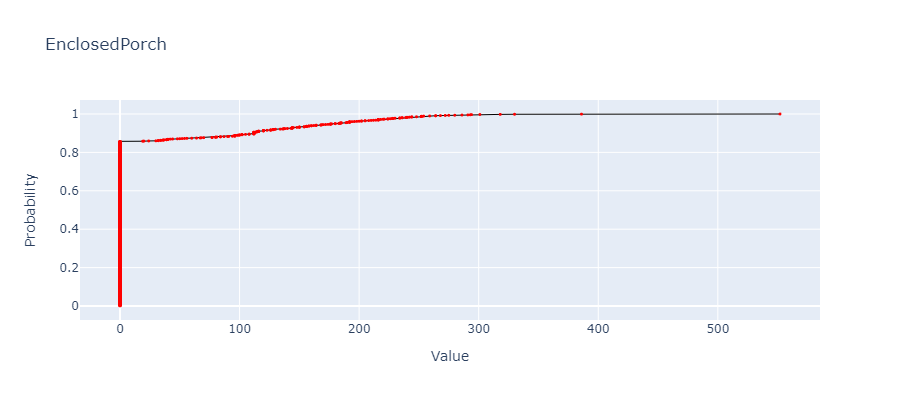

3SsnPorch


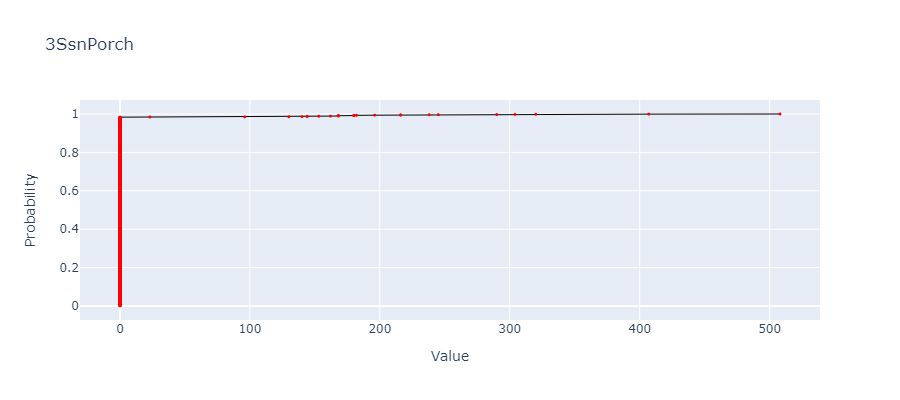

ScreenPorch


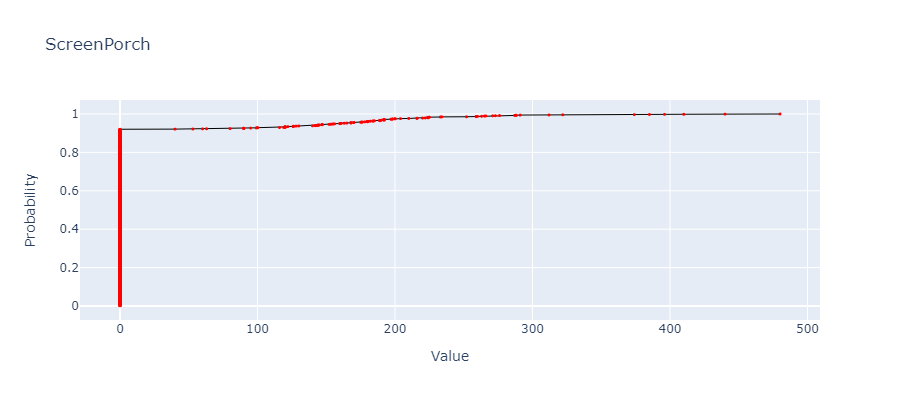

PoolArea


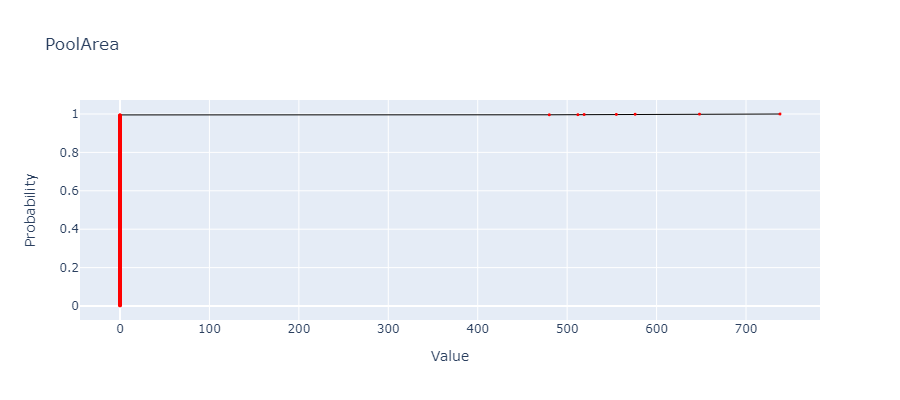

MiscVal


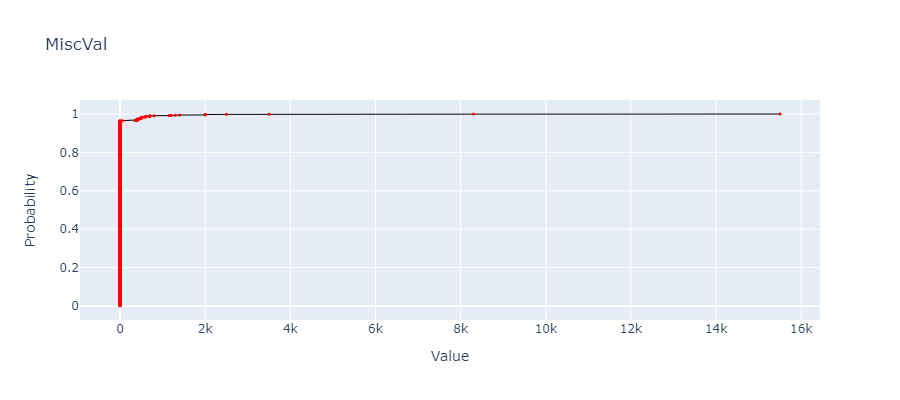

MoSold


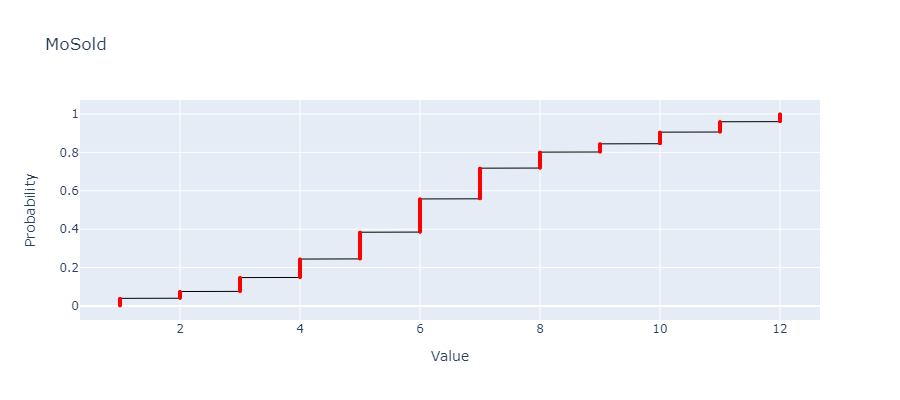

YrSold


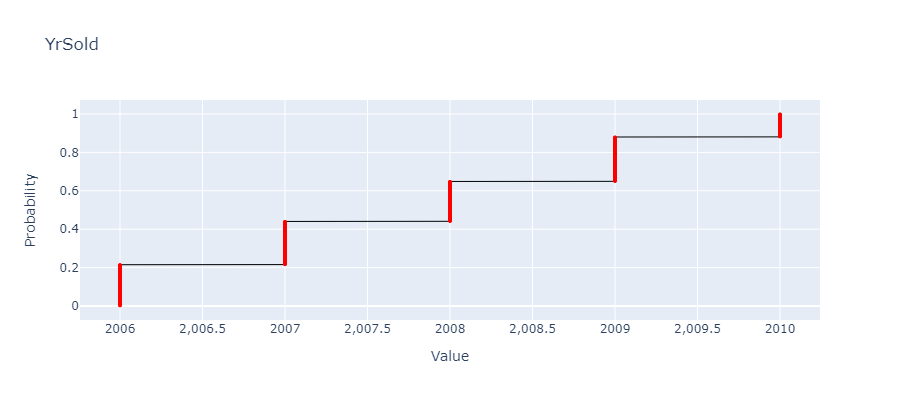

In [28]:
#fig = go.Figure()
for column in num_columns:
    fig = go.Figure()
    ecdf = ECDF(train_df[column])
    fig.add_trace(
        go.Scatter(
            x=ecdf.x,
            y=ecdf.y,
            mode='markers+lines',
            legendgroup="group",
            name = column,
            marker = dict(color = 'red',size = 3),
            line = dict(color = 'black',width  = 1)
        )
    )
    print(column)
    fig.update_layout(title = column)
    fig.update_yaxes(automargin=True,title = 'Probability')
    fig.update_xaxes(automargin=True,title = 'Value')
    fig.update_layout(
        width=900,
        height=400)
    fig.show(renderer = 'png')

In [29]:
excluded_num_columns = [
    'BsmtFinSF2',
    'LowQualFinSF',
    'BsmtHalfBath',
    'EnclosedPorch',
    '3SsnPorch',
    'ScreenPorch',
    'PoolArea',
    'MiscVal'
]

In [30]:
for column in excluded_num_columns:
    num_columns.remove(column)

In [31]:
num_columns

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'BsmtFullBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'MoSold',
 'YrSold']

In [32]:
expected_columns = []
expected_columns.extend(num_columns)
expected_columns.extend(cat_columns)
len(expected_columns)

55

In [33]:
train_df[expected_columns]

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,BsmtExposure,BsmtFinType1,HeatingQC,KitchenQual,FireplaceQu,GarageType,GarageFinish,Fence,SaleType,SaleCondition
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,No,GLQ,Ex,Gd,empty,Attchd,RFn,empty,WD,Normal
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,Gd,ALQ,Ex,TA,TA,Attchd,RFn,empty,WD,Normal
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,Mn,GLQ,Ex,Gd,TA,Attchd,RFn,empty,WD,Normal
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,No,ALQ,Gd,Gd,Gd,Detchd,Unf,empty,WD,Abnorml
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,Av,GLQ,Ex,Gd,TA,Attchd,RFn,empty,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,No,Unf,Ex,TA,TA,Attchd,RFn,empty,WD,Normal
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,No,ALQ,TA,TA,TA,Attchd,Unf,MnPrv,WD,Normal
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,No,GLQ,Ex,Gd,Gd,Attchd,RFn,GdPrv,WD,Normal
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,Mn,GLQ,Gd,Gd,empty,Attchd,Unf,empty,WD,Normal


In [34]:
test_df[expected_columns]

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,BsmtExposure,BsmtFinType1,HeatingQC,KitchenQual,FireplaceQu,GarageType,GarageFinish,Fence,SaleType,SaleCondition
0,1461,20,80.0,11622,5,6,1961,1961,0.0,468.0,...,No,Rec,TA,TA,empty,Attchd,Unf,MnPrv,WD,Normal
1,1462,20,81.0,14267,6,6,1958,1958,108.0,923.0,...,No,ALQ,TA,Gd,empty,Attchd,Unf,empty,WD,Normal
2,1463,60,74.0,13830,5,5,1997,1998,0.0,791.0,...,No,GLQ,Gd,TA,TA,Attchd,Fin,MnPrv,WD,Normal
3,1464,60,78.0,9978,6,6,1998,1998,20.0,602.0,...,No,GLQ,Ex,Gd,Gd,Attchd,Fin,empty,WD,Normal
4,1465,120,43.0,5005,8,5,1992,1992,0.0,263.0,...,No,ALQ,Ex,Gd,empty,Attchd,RFn,empty,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,21.0,1936,4,7,1970,1970,0.0,0.0,...,No,Unf,Gd,TA,empty,empty,empty,empty,WD,Normal
1455,2916,160,21.0,1894,4,5,1970,1970,0.0,252.0,...,No,Rec,TA,TA,empty,CarPort,Unf,empty,WD,Abnorml
1456,2917,20,160.0,20000,5,7,1960,1996,0.0,1224.0,...,No,ALQ,Ex,TA,TA,Detchd,Unf,empty,WD,Abnorml
1457,2918,85,62.0,10441,5,5,1992,1992,0.0,337.0,...,Av,GLQ,TA,TA,empty,empty,empty,MnPrv,WD,Normal


### Training

In [35]:
X,y = train_df[expected_columns].iloc[:,1:], train_df.SalePrice

In [36]:
from sklearn.model_selection import train_test_split

X_train, X_validation, y_train, y_validation = train_test_split(X, y, train_size=0.80, random_state=42)

X_test = test_df[expected_columns].iloc[:,1:]

In [37]:
X_train.shape, X_validation.shape, y_train.shape, y_validation.shape, X_test.shape

((1168, 54), (292, 54), (1168,), (292,), (1459, 54))

In [38]:
from catboost import CatBoostRegressor, Pool
from sklearn.metrics import r2_score, mean_squared_error

In [39]:
cat_columns[1:]

['MSZoning',
 'LotShape',
 'LandContour',
 'LotConfig',
 'Neighborhood',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtExposure',
 'BsmtFinType1',
 'HeatingQC',
 'KitchenQual',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'Fence',
 'SaleType',
 'SaleCondition']

In [40]:
train_pool = Pool(X_train,
                  y_train,
                  cat_features=cat_columns[1:])

In [41]:
val_pool = Pool(X_validation,
                label=y_validation,
                cat_features=cat_columns[1:])

In [42]:
test_pool = Pool(X_test,                 
                 cat_features=cat_columns[1:])

In [43]:
cat = CatBoostRegressor()

In [44]:
model = CatBoostRegressor(objective='RMSE',
                          iterations = 10500,
                          learning_rate = 0.005,
                          depth = 6,
                          early_stopping_rounds= 200,
                          use_best_model = True,
                          l2_leaf_reg = 2)                     
                        

model.fit(train_pool, plot=True, eval_set=val_pool, verbose=500)

predicted_counts_rmse = model.predict(test_pool)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 76982.9674230	test: 87369.3491192	best: 87369.3491192 (0)	total: 170ms	remaining: 29m 39s
500:	learn: 28022.3374622	test: 36601.8520188	best: 36601.8520188 (500)	total: 16.3s	remaining: 5m 24s
1000:	learn: 19737.6776560	test: 29240.9250163	best: 29240.9250163 (1000)	total: 33.3s	remaining: 5m 15s
1500:	learn: 16893.1221029	test: 27402.8041658	best: 27402.8041658 (1500)	total: 49.9s	remaining: 4m 59s
2000:	learn: 15190.5753635	test: 26611.2815261	best: 26611.2815261 (2000)	total: 1m 9s	remaining: 4m 55s
2500:	learn: 13808.6407854	test: 26202.5420310	best: 26202.5420310 (2500)	total: 1m 28s	remaining: 4m 43s
3000:	learn: 12667.6917304	test: 26010.7892280	best: 26010.6710959 (2996)	total: 1m 47s	remaining: 4m 27s
3500:	learn: 11697.7848951	test: 25833.9371197	best: 25833.4143820 (3499)	total: 2m 5s	remaining: 4m 11s
4000:	learn: 10975.4966246	test: 25747.8891077	best: 25747.8891077 (4000)	total: 2m 25s	remaining: 3m 56s
4500:	learn: 10337.6605198	test: 25665.3558062	best: 25665.

In [45]:
predicted_counts_rmse

array([119549.29690418, 162373.3235724 , 189199.80825115, ...,
       168404.30062512, 119184.74405402, 212622.59715805])

In [49]:
# R2 for TRAIN
accuracy_cat = model.score(train_pool)
print("CatBoost score: {:.4f}".format(accuracy_cat))
# R2 for VAlIDATION
accuracy_cat = model.score(val_pool)
print("CatBoost score: {:.4f}".format(accuracy_cat))


CatBoost score: 0.9859
CatBoost score: 0.9160


In [50]:
R = pd.DataFrame()
R['Id'] = test_df.Id
R['SalePrice'] = predicted_counts_rmse

In [51]:
R.to_csv('Predict.csv',index=False)